## Exercise 6.2 Exploring Relationships

## This script contains the following:

#### 1. Importing Visualization Libraries and Data

#### 2. Data Cleaning

#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

#### 1. Importing Visualization Libraries and Data

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from matplotlib.ticker import ScalarFormatter

In [3]:
# Checking matplotlib version

matplotlib.__version__

'3.8.0'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# creating path folder 
path = r'C:\Users\cpaul\Documents\Career Foundry\Causes of deaths other than diseases'

In [6]:
# Importing dataset, causes_of_deaths_merged.csv to create df

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'causes_of_deaths_merged.csv'), index_col = False)

In [7]:
df.shape

(10670, 13)

In [8]:
df.head()

,Unnamed: 0,country,country_code,year,deaths,cause,male_population,female_population,total_population,gdp_value,income_group,region,sub_region
0,5238,Afghanistan,AFG,2007,8216,Conflict and Terrorism,13938967.0,13161569.0,27100536.0,9.715765e+09,L,Asia,Southern Asia
1,5239,Albania,ALB,2007,0,Conflict and Terrorism,1491760.0,1478257.0,2970017.0,1.067732e+10,LM,Europe,Southern Europe
2,5240,Algeria,DZA,2007,699,Conflict and Terrorism,17263892.0,16903080.0,34166972.0,1.350000e+11,LM,Africa,Northern Africa
3,5241,American Samoa,ASM,2007,2,Conflict and Terrorism,NaN,NaN,NaN,5.180000e+08,UM,Oceania,Polynesia
4,5242,Angola,AGO,2007,34,Conflict and Terrorism,10354341.0,10551022.0,20905363.0,6.526642e+10,LM,Africa,Sub-Saharan Africa


In [45]:
df.tail()

,Unnamed: 0,country,country_code,year,deaths,cause,male_population,female_population,total_population,gdp_value,income_group,region,sub_region
10665,36855,Vietnam,VNM,2017,0,Other Injuries,47191019.0,47405623.0,94596642.0,2.810000e+11,LM,Asia,South-eastern Asia
10666,36856,"Virgin Islands, U.S.",VGB,2017,0,Other Injuries,NaN,NaN,NaN,NaN,H,Americas,Latin America and the Caribbean
10667,36857,Yemen,YEM,2017,21,Other Injuries,14027304.0,13807517.0,27834821.0,2.684223e+10,L,Asia,Western Asia
10668,36858,Zambia,ZMB,2017,0,Other Injuries,8342800.0,8510888.0,16853688.0,2.587360e+10,LM,Africa,Sub-Saharan Africa
10669,36859,Zimbabwe,ZWE,2017,64,Other Injuries,6777124.0,7459621.0,14236745.0,1.758489e+10,L,Africa,Sub-Saharan Africa


#### 2. Data cleaning - updating the income_group column value to a descriptive value instead of coded values.

In [9]:
# Checking value_counts for income_group 
df['income_group'].value_counts()

H       3050
LM      2820
UM      2740
L       2000
Null      60
Name: income_group, dtype: int64

In [10]:
# Checking datatypes

df.dtypes


Unnamed: 0             int64
country               object
country_code          object
year                   int64
deaths                 int64
cause                 object
male_population      float64
female_population    float64
total_population     float64
gdp_value            float64
income_group          object
region                object
sub_region            object
dtype: object

In [11]:
#drop column 'Unnamed: 0'
df = df.drop(columns = ['Unnamed: 0'])

# Set data types to be sure

df['country'] = df['country'].astype('str')
df['country_code'] = df['country_code'].astype('str')
df['cause'] = df['cause'].astype('str')
df['income_group'] = df['income_group'].astype('str')
df['region'] = df['region'].astype('str')
df['sub_region'] = df['sub_region'].astype('str')


In [12]:
df.dtypes

country               object
country_code          object
year                   int64
deaths                 int64
cause                 object
male_population      float64
female_population    float64
total_population     float64
gdp_value            float64
income_group          object
region                object
sub_region            object
dtype: object

In [13]:
for col in df:
    print (df[col].apply(type))

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
10665    <class 'str'>
10666    <class 'str'>
10667    <class 'str'>
10668    <class 'str'>
10669    <class 'str'>
Name: country, Length: 10670, dtype: object
0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
10665    <class 'str'>
10666    <class 'str'>
10667    <class 'str'>
10668    <class 'str'>
10669    <class 'str'>
Name: country_code, Length: 10670, dtype: object
0        <class 'int'>
1        <class 'int'>
2        <class 'int'>
3        <class 'int'>
4        <class 'int'>
             ...      
10665    <class 'int'>
10666    <class 'int'>
10667    <class 'int'>
10668    <class 'int'>
10669    <class 'int'>
Name: year, Length: 10670, dtype: object
0        <class 'int'>
1        <class 'int'>
2        <class 'int'>
3        <class 'int'>
4        <class

In [14]:
# Checking the rows with 'L' for low income values

df.loc[df['income_group'] == 'L']

,country,country_code,year,deaths,cause,male_population,female_population,total_population,gdp_value,income_group,region,sub_region
0,Afghanistan,AFG,2007,8216,Conflict and Terrorism,13938967.0,13161569.0,27100536.0,9.715765e+09,L,Asia,Southern Asia
12,Bangladesh,BGD,2007,19,Conflict and Terrorism,72855835.0,69804541.0,142660376.0,7.961189e+10,L,Asia,Southern Asia
17,Benin,BEN,2007,0,Conflict and Terrorism,4194027.0,4260766.0,8454793.0,8.169048e+09,L,Africa,Sub-Saharan Africa
26,Burkina Faso,BFA,2007,0,Conflict and Terrorism,7045682.0,7206339.0,14252021.0,7.625723e+09,L,Africa,Sub-Saharan Africa
27,Burundi,BDI,2007,35,Conflict and Terrorism,3879438.0,3982776.0,7862214.0,1.356199e+09,L,Africa,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
10648,The Gambia,GMB,2017,0,Other Injuries,1098093.0,1115801.0,2213894.0,1.504909e+09,L,Africa,Sub-Saharan Africa
10650,Togo,TGO,2017,0,Other Injuries,3827461.0,3871014.0,7698475.0,6.395472e+09,L,Africa,Sub-Saharan Africa
10656,Uganda,UGA,2017,14,Other Injuries,20246144.0,20916321.0,41162465.0,3.074447e+10,L,Africa,Sub-Saharan Africa
10667,Yemen,YEM,2017,21,Other Injuries,14027304.0,13807517.0,27834821.0,2.684223e+10,L,Asia,Western Asia


In [15]:
# Replacing the values

df['income_group'].replace('L', 'Low income', inplace=True)
df['income_group'].replace('LM', 'Lower Middle income', inplace=True)
df['income_group'].replace('UM', 'Upper Middle income', inplace=True)
df['income_group'].replace('H', 'High income', inplace=True)

In [16]:
df['income_group'].value_counts()

High income            3050
Lower Middle income    2820
Upper Middle income    2740
Low income             2000
Null                     60
Name: income_group, dtype: int64

In [17]:
# Creating new columns, death_percentage and gdp_per_capita

df["death_percentage"] = (df["deaths"] / sum(df["total_population"])) * 100

df["gdp_per_capita"] = df["gdp_value"] / df["total_population"]

In [18]:
df.head(10)

,country,country_code,year,deaths,cause,male_population,female_population,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita
0,Afghanistan,AFG,2007,8216,Conflict and Terrorism,13938967.0,13161569.0,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.030317,358.508227
1,Albania,ALB,2007,0,Conflict and Terrorism,1491760.0,1478257.0,2970017.0,1.067732e+10,Lower Middle income,Europe,Southern Europe,0.000000,3595.038302
2,Algeria,DZA,2007,699,Conflict and Terrorism,17263892.0,16903080.0,34166972.0,1.350000e+11,Lower Middle income,Africa,Northern Africa,0.002046,3951.184202
3,American Samoa,ASM,2007,2,Conflict and Terrorism,NaN,NaN,NaN,5.180000e+08,Upper Middle income,Oceania,Polynesia,NaN,NaN
4,Angola,AGO,2007,34,Conflict and Terrorism,10354341.0,10551022.0,20905363.0,6.526642e+10,Lower Middle income,Africa,Sub-Saharan Africa,0.000163,3121.993897
5,Antigua and Barbuda,ATG,2007,0,Conflict and Terrorism,40016.0,44010.0,84026.0,1.312759e+09,High income,Americas,Latin America and the Caribbean,0.000000,15623.250649
6,Argentina,ARG,2007,0,Conflict and Terrorism,19293165.0,20391130.0,39684295.0,2.880000e+11,Upper Middle income,Americas,Latin America and the Caribbean,0.000000,7257.278982
7,Armenia,ARM,2007,4,Conflict and Terrorism,1376498.0,1556120.0,2932618.0,9.206301e+09,Lower Middle income,Asia,Western Asia,0.000136,3139.277350
8,Australia,AUS,2007,0,Conflict and Terrorism,10405448.0,10422152.0,20827600.0,8.540000e+11,High income,Oceania,Australia and New Zealand,0.000000,41003.284104
9,Austria,AUT,2007,0,Conflict and Terrorism,4035626.0,4259861.0,8295487.0,3.890000e+11,High income,Europe,Western Europe,0.000000,46892.967224


#### 3. Exploring Relationships

In [19]:
# Create subset including: deaths, male_population, female_population, total_population, gdp_value, death_percentage and gdp_per_capita
df_subset = df[['deaths', 'male_population', 'female_population', 'total_population', 'gdp_value', 'death_percentage', 'gdp_per_capita']]

#### Correlation matrix Heat map

In [20]:
df_subset

,deaths,male_population,female_population,total_population,gdp_value,death_percentage,gdp_per_capita
0,8216,13938967.0,13161569.0,27100536.0,9.715765e+09,0.030317,358.508227
1,0,1491760.0,1478257.0,2970017.0,1.067732e+10,0.000000,3595.038302
2,699,17263892.0,16903080.0,34166972.0,1.350000e+11,0.002046,3951.184202
3,2,NaN,NaN,NaN,5.180000e+08,NaN,NaN
4,34,10354341.0,10551022.0,20905363.0,6.526642e+10,0.000163,3121.993897
...,...,...,...,...,...,...,...
10665,0,47191019.0,47405623.0,94596642.0,2.810000e+11,0.000000,2970.507135
10666,0,NaN,NaN,NaN,NaN,NaN,NaN
10667,21,14027304.0,13807517.0,27834821.0,2.684223e+10,0.000075,964.339997
10668,0,8342800.0,8510888.0,16853688.0,2.587360e+10,0.000000,1535.189287


In [21]:
# create a correlation matrix
df_subset.corr()

,deaths,male_population,female_population,total_population,gdp_value,death_percentage,gdp_per_capita
deaths,1.000000,0.054510,0.055202,0.054852,0.010896,0.837327,-0.033745
male_population,0.054510,1.000000,0.999506,0.999884,0.488680,-0.005761,-0.045735
female_population,0.055202,0.999506,1.000000,0.999869,0.505373,-0.005904,-0.044139
total_population,0.054852,0.999884,0.999869,1.000000,0.496835,-0.005831,-0.044967
gdp_value,0.010896,0.488680,0.505373,0.496835,1.000000,-0.009049,0.269443
death_percentage,0.837327,-0.005761,-0.005904,-0.005831,-0.009049,1.000000,-0.023140
gdp_per_capita,-0.033745,-0.045735,-0.044139,-0.044967,0.269443,-0.023140,1.000000


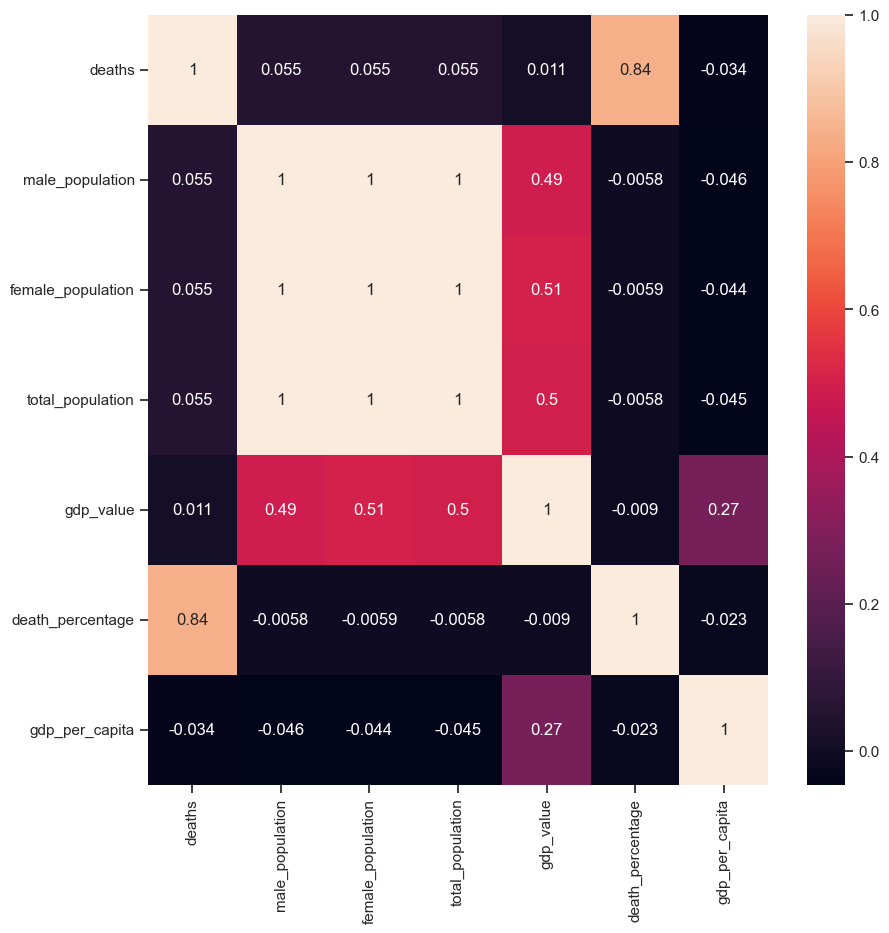

In [32]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [33]:
#Export viz
corr.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'heatmap.png'))

From this heat map, It is evident that the number of deaths has very very weak positive relationship with the gdp_value. The only moderate relationship seen is between the gdp_value and the various population fields such as male_population(0.49), female_population(0.51), and total_population(0.5).

#### Scatterplots

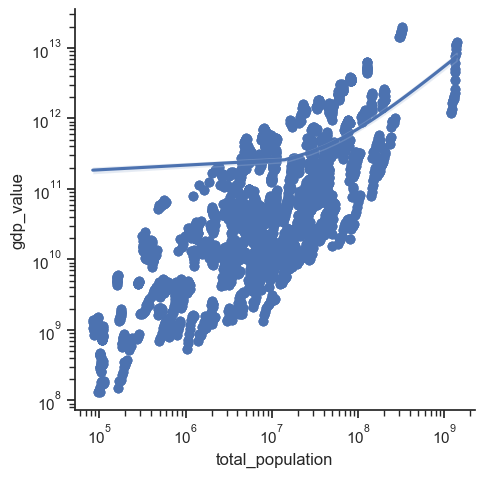

In [34]:
# Create a scatterplot for the "total_population" and "gdp_value" columns in seaborn

scatter_1 = sns.lmplot(x = 'total_population', y = 'gdp_value', data = df_subset)
plt.xscale('log')
plt.yscale('log')

In [35]:
#Export viz
scatter_1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_totalpopulation_gdpvalue.png'))

The scatterplot shows a moderate upward trend line with a positive relationship. but there is lot of variance in the data.  

The gross domestic product is high in some datapoints even though the population is low. Likewise, there are lots of data points with moderate gdp_value where the total population is very high. There are some outlier values where the gdp_value is high when the population is high as in the top right.

The large number of data points that don’t fall close to the trend line shows that the correlation coefficient alone isn’t enough to produce a holistic view of the relationship between these two variables. 

Note: Both x-axis and y-axis are on logarithmic scales.

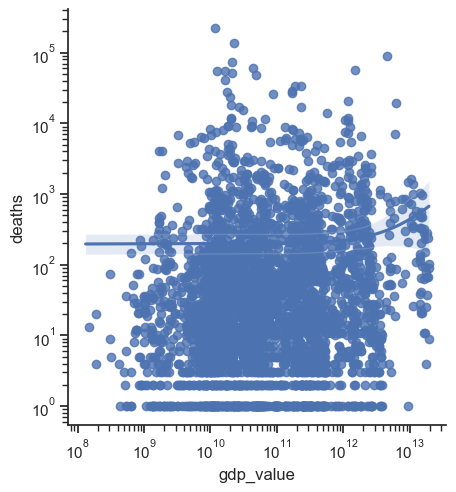

In [37]:
# Create a scatterplot for the "gdp_value" and "deaths" columns in seaborn

scatter_2 = sns.lmplot(x = 'gdp_value', y = 'deaths', data = df_subset)
plt.xscale('log')
plt.yscale('log')

In [38]:
#Export viz
scatter_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_gdpvalue_deaths.png'))

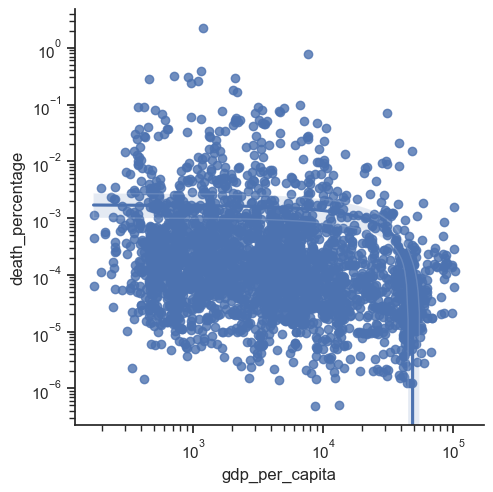

In [39]:
# Create a scatterplot for the "gdp_per_capita" and "death_percentage" columns in seaborn

#fig = plt.figure()

# plot deaths (as percent of total pop.) vs gdp per capita
#plt.scatter(df_subset['gdp_value']/df_subset['total_population'],df_subset['deaths']/df_subset['total_population'])

scatter_2_other = sns.lmplot(x = 'gdp_per_capita', y = 'death_percentage', data = df_subset)
plt.xscale('log')
plt.yscale('log')

In [40]:
#Export viz
scatter_2_other.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_gdppercapita_deathpercentage.png'))

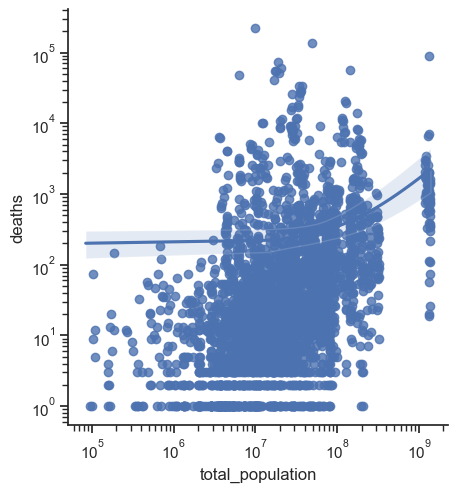

In [41]:
# Create a scatterplot for the "total_population" and "deaths" columns in seaborn

scatter_3 = sns.lmplot(x = 'total_population', y = 'deaths', data = df_subset)
plt.xscale('log')
plt.yscale('log')

In [43]:
#Export viz
scatter_3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_totalpopulation_deaths.png'))

#### Pair plots

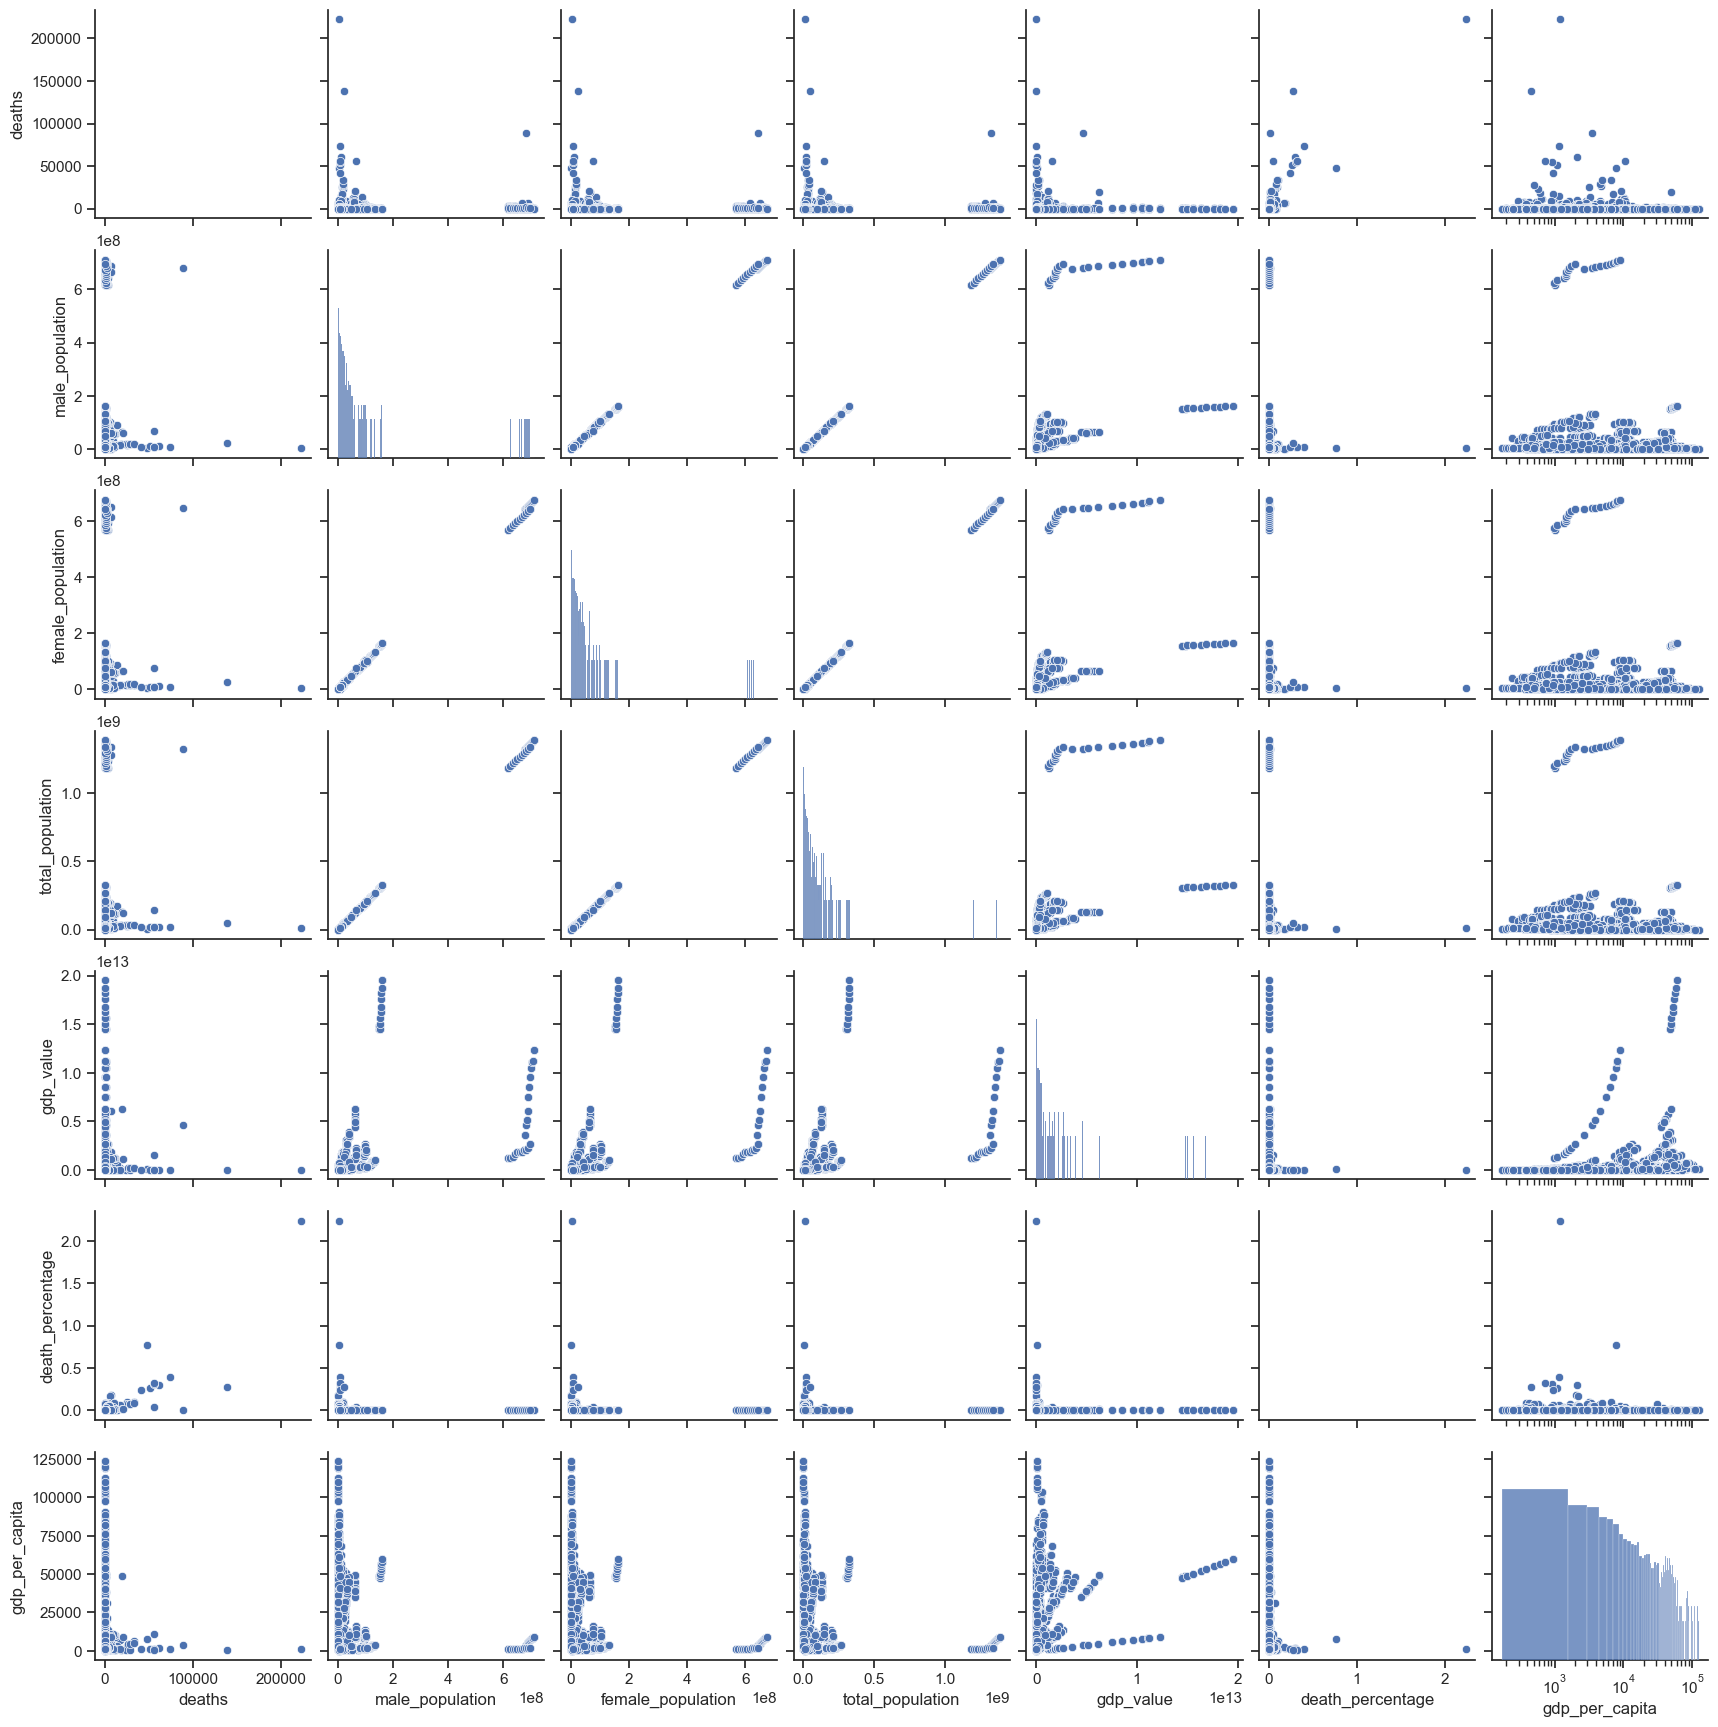

In [44]:
# Create pair plot
pairplot = sns.pairplot(df_subset)
plt.xscale('log')
plt.yscale('log')

In [45]:
#Export viz
pairplot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pairplot.png'))

#### Categorical Plots

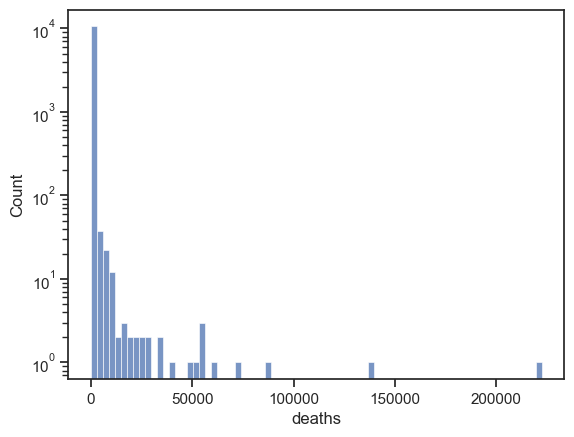

In [50]:
deaths_hist = sns.histplot(df_subset['deaths'],bins = 75)
plt.yscale('log')     # changing the y-axis to logarithmic scaling

In [51]:
#Export viz
deaths_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'deaths_hist.png'))

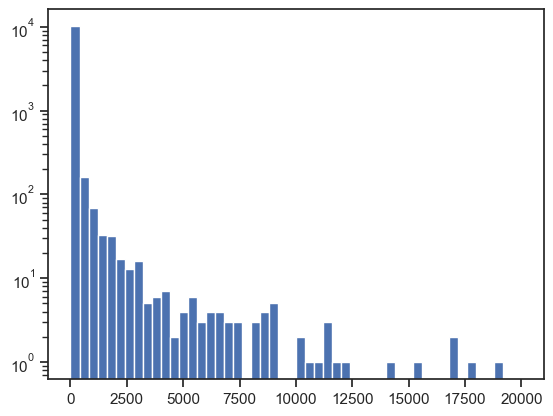

In [125]:
# example of using range argument to zoom into histogram x-axis -- matplotlib hist
# Don't have to export this visualization

deaths_hist = plt.hist(df_subset['deaths'],bins = 50,range=(0,20000))
plt.yscale('log')

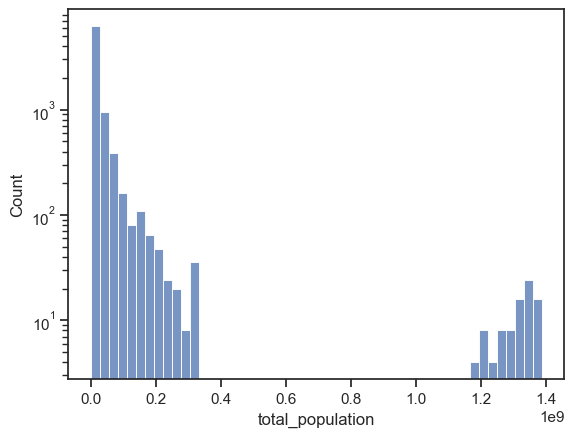

In [52]:
total_population_hist = sns.histplot(df_subset['total_population'],bins = 50)
plt.yscale('log')

In [53]:
#Export viz
total_population_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'total_population_hist.png'))

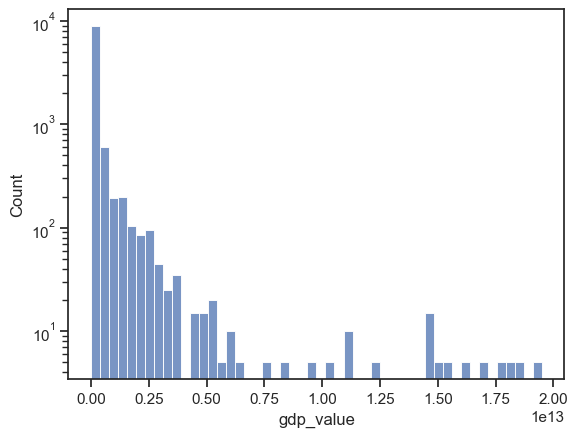

In [54]:
gdp_value_hist = sns.histplot(df_subset['gdp_value'],bins = 50)
plt.yscale('log')

In [55]:
#Export viz
gdp_value_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'gdp_value_hist.png'))

In [22]:
# Create subset with categorical and numerical variables
# Create subset including: deaths, cause, male_population, female_population, total_population, gdp_value, income_group, death_percentage, and gdp_per_capita
df_subset_2 = df[['deaths', 'male_population', 'female_population', 'total_population', 'gdp_value', 'death_percentage', 'gdp_per_capita', 'cause', 'income_group']]

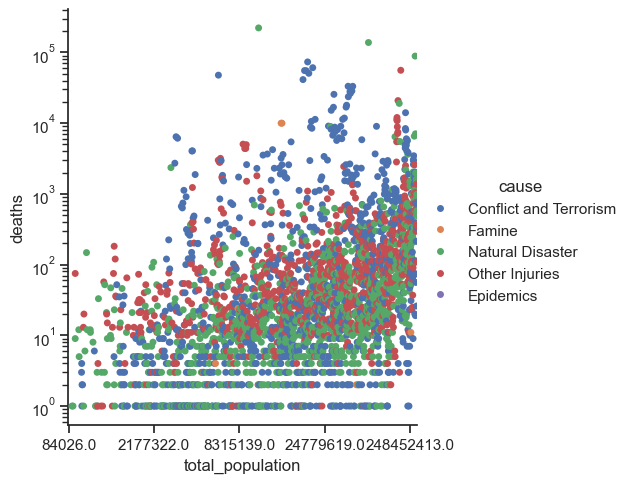

In [57]:
# Create Categorical Plots

cat_1 = sns.catplot(x = 'total_population', y = 'deaths', hue = 'cause', data = df_subset_2)
xtick_positions = range(0, len(cat_1.ax.get_xticks()), 500)

# Use the xticks parameter to set the positions of the ticks
cat_1.set(xticks=xtick_positions)

plt.yscale('log')

In [58]:
#Export viz
cat_1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_totalpopulation_deaths_cause.png'))

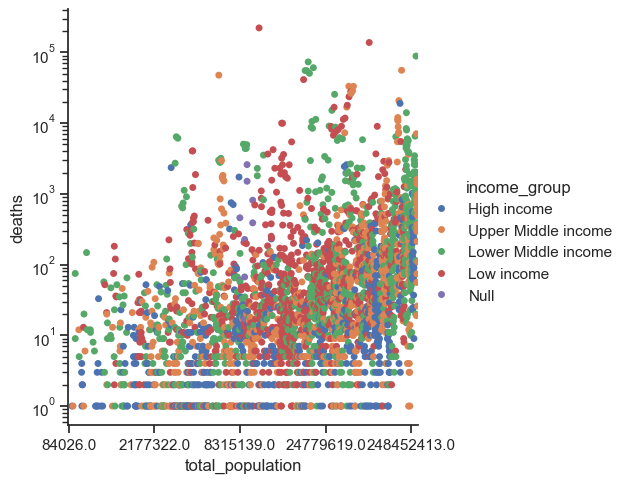

In [59]:
# Create categorical plot with x-axis as a linear scale as opposed to x-axis as a logarithmic scale

cat_2_other = sns.catplot(x = 'total_population', y = 'deaths', hue = 'income_group', data = df_subset_2)
xtick_positions = range(0, len(cat_2_other.ax.get_xticks()), 500)

# Use the xticks parameter to set the positions of the ticks
cat_2_other.set(xticks=xtick_positions)

plt.yscale('log')

In [77]:
#Export viz
cat_2_other.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_totalpopulation_deaths_incomegroup.png'))

(0.0, 0.1)

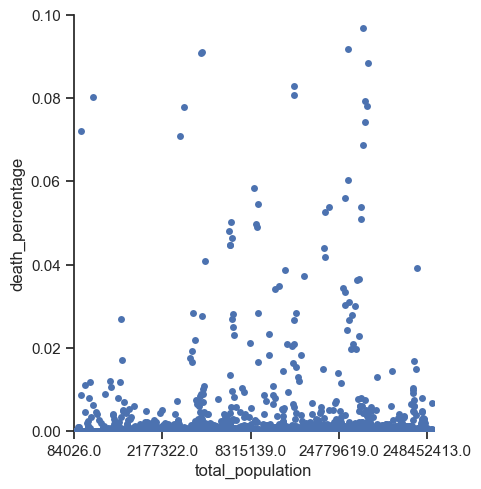

In [79]:
# Create categorical plot 

cat_2 = sns.catplot(x = 'total_population', y = 'death_percentage', data = df_subset_2)
xtick_positions = range(0, len(cat_2.ax.get_xticks()), 500)

# Use the xticks parameter to set the positions of the ticks
cat_2.set(xticks=xtick_positions)

#plt.yscale('log')
plt.ylim([0.0, 0.1]) # ylim to zoom in to see the values

In [80]:
#Export viz
cat_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_totalpopulation_deathpercentage.png'))

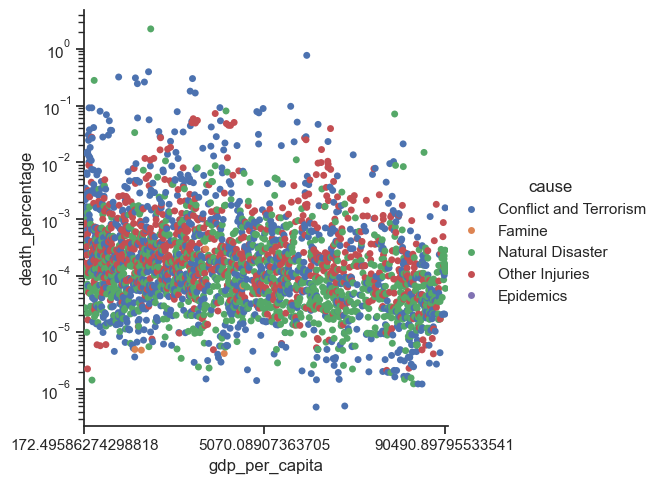

In [61]:
# Create Categorical Plot

cat_3_other = sns.catplot(x = 'gdp_per_capita', y = 'death_percentage', hue = 'cause', data = df_subset_2)
xtick_positions = range(0, len(cat_3_other.ax.get_xticks()), 1000)

# Use the xticks parameter to set the positions of the ticks
cat_3_other.set(xticks=xtick_positions)

plt.yscale('log')


#sns.set(style = "ticks")
#cat_3 = sns.catplot(x = 'gdp_per_capita', y = 'death_percentage', hue = 'cause', data = df_subset_2)
#plt.xscale('log')
#plt.yscale('log')
# Data is not displayed correctly when x-axis is set to logarithmic scale, shows only up umtil 10**3 position

In [62]:
#Export viz
cat_3_other.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_gdppercapita_deathpercentage_cause.png'))

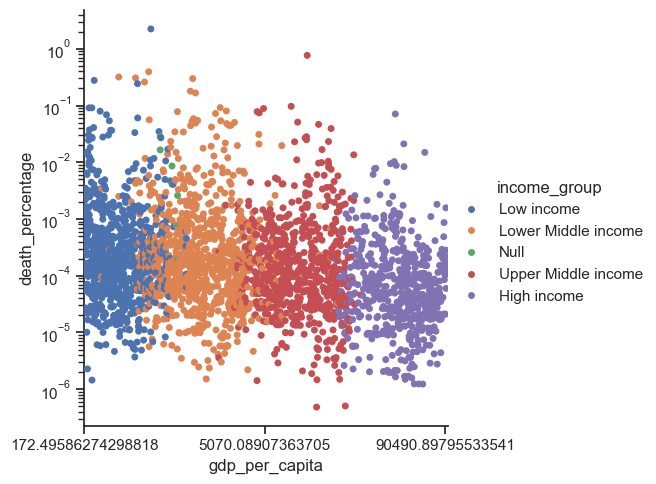

In [63]:
# Create Categorical Plot

cat_4_other = sns.catplot(x = 'gdp_per_capita', y = 'death_percentage', hue = 'income_group', data = df_subset_2)
xtick_positions = range(0, len(cat_4_other.ax.get_xticks()), 1000)

# Use the xticks parameter to set the positions of the ticks
cat_4_other.set(xticks=xtick_positions)

plt.yscale('log')


#sns.set(style = "ticks")
#cat_4 = sns.catplot(x = 'gdp_per_capita', y = 'death_percentage', hue = 'income_group', data = df_subset_2)
#plt.xscale('log')
#plt.yscale('log')

In [64]:
#Export viz
cat_4_other.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_gdppercapita_deathpercentage_incomegroup.png'))

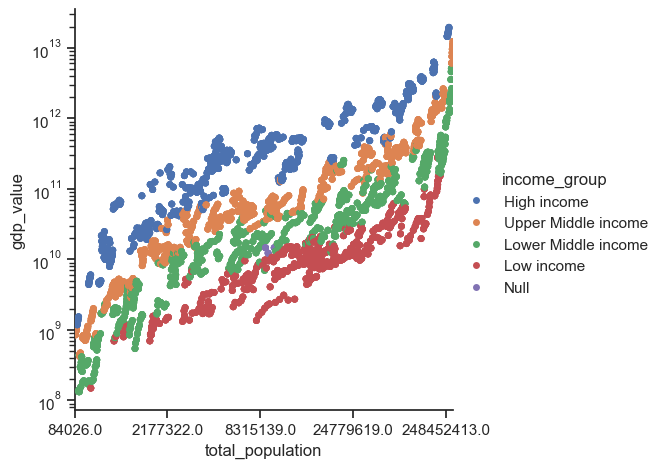

In [65]:
# Create Categorical Plot

cat_5_other = sns.catplot(x = 'total_population', y = 'gdp_value', hue = 'income_group', data = df_subset_2)
xtick_positions = range(0, len(cat_5_other.ax.get_xticks()), 500)

# Use the xticks parameter to set the positions of the ticks
cat_5_other.set(xticks=xtick_positions)

plt.yscale('log')

#sns.set(style = "ticks")
#cat_6 = sns.catplot(x = 'total_population', y = 'gdp_value', hue = 'income_group', data = df_subset_2)
#plt.yscale('log')

In [66]:
#Export viz
cat_5_other.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cat_totalpopulation_gdpvalue_incomegroup.png'))

In [ ]:
There seems to be moderate positive relationship between the total_population and gdp_value. The gdp_value range is higher for the high income group 
and decreases with the upper middle to lower middle to low income groups.

Note: x-axis is on a linear scale and y-axis is on logarithmic scale.

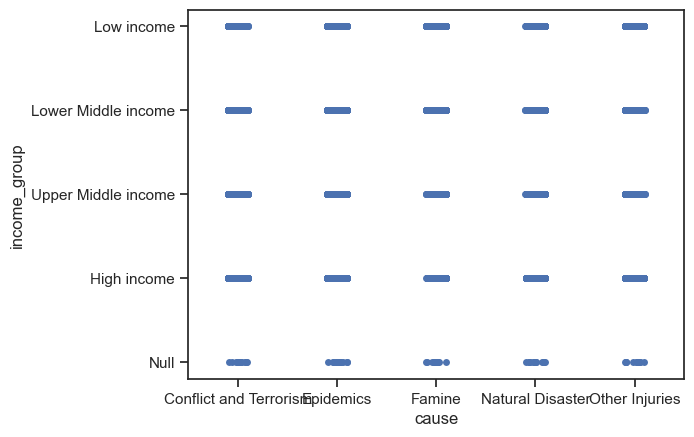

In [71]:
# Create catplot

strip = sns.stripplot(data=df_subset_2, x="cause", y="income_group")


In [72]:
#Export viz
strip.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'strip_incomegroup_cause.png'))

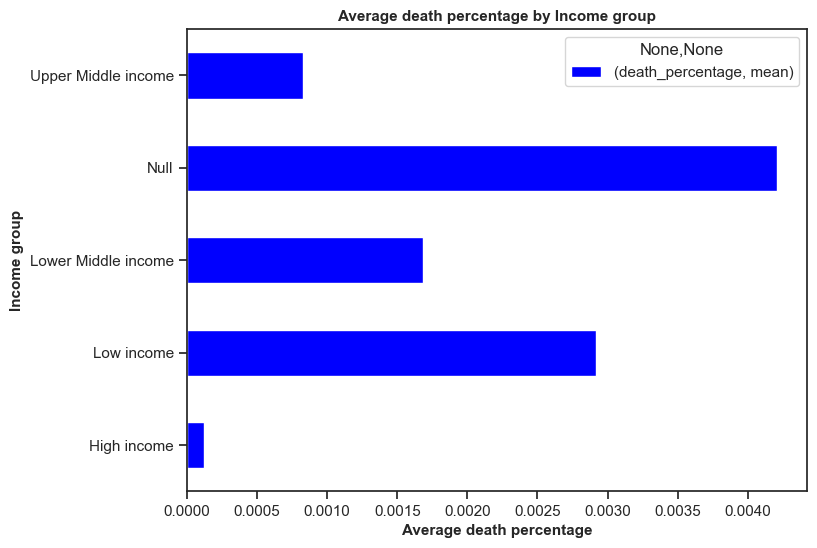

In [67]:
# Create Bar chart to study the Average death percentage by income_group

average_deathpercentage_by_incomegroup = df_subset_2.groupby('income_group').agg({'death_percentage': ['mean']})

bar_average_deathpercentage_by_incomegroup = average_deathpercentage_by_incomegroup.plot.barh(figsize = (8,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Average death percentage', fontsize = 11, fontweight = 'bold')
plt.ylabel('Income group', fontsize = 11, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Average death percentage by Income group', fontsize = 11, fontweight = 'bold')
plt.show()

In [73]:
# Saving stacked bar chart
bar_average_deathpercentage_by_incomegroup.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_average_deathpercentage_by_incomegroup.png'))


#### Hypothesis

In [81]:
# Export the dataset with updated income_group variable, new columns gdp_per_capita and death_percentage

df.to_csv(os.path.join(path, 'Data','Prepared Data', 'causes_of_deaths_merged_wrangled.csv'))